# OpenCV Image Histograms ```cv2.calcHist```

In this tutorial, you will learn how to compute image histograms using OpenCV and the ```cv2.calcHist()``` function.

- Histograms are prevalent in nearly every aspect of computer vision. _We use grayscale histograms for thresholding. We use histograms for white balancing. We use color histograms for object tracking in images, such as with the CamShift algorithm. We use color histograms as features — include color histograms in multiple dimensions. And in an abstract sense, we use histograms of image gradients to form the HOG and SIFT descriptors_.

- Even the extremely popular bag-of-visual-words representation used in image search engines and machine learning is a histogram as well!

So, why are histograms so useful? Because histograms capture the frequency distribution of a set of data. And it turns out that __examining these frequency distributions is a very nice way to build simple image processing techniques … along with very powerful machine learning algorithms__.

In this tutorial post you’ll receive an introduction to image histograms, including how to compute grayscale and color histograms.

[Reference](https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/)

### What is an image histogram?

__A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image__. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. _We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255_.

- When plotting the histogram, the x-axis serves as our “bins.” If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs.

- In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128] or [128, 255].

The number of pixels binned to the x-axis value is then plotted on the y-axis.

We will be using the ```cv2.calcHist()``` function to build our histograms. Before we get into any code examples, let’s quickly review the function:

```cv2.calcHist(images, channels, mask, histSize, ranges)```

- images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage].

- channels: A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2].

- mask: Remember learning about masks in my Image Masking with OpenCV guide? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.

- histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32].

- ranges: The range of possible pixel values. Normally, this is [0, 256] (that is not a typo — the ending range of the ```cv2.calcHist``` function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different).

In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

import cv2
import OpenEXR
import Imath
from PIL import Image
import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For example, take a look at the (grayscale) PyImageSearch logo below and its thresholded counterpart:

In [2]:
# Read image-
img = cv2.imread("/home/majumdar/Pictures/Screenshots/pyimagesearch_logo.png")

In [4]:
# Convert colored image to gray-scale-
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
# Sanity check-
img.shape, img_gray.shape

((73, 315, 3), (73, 315))

In [12]:
# Compute a grayscale histogram-
'''
1. First argument: this is the grayscale image.

2. Second argument: A grayscale image has only one channel, so we have a value of [0] for channels.

3. Third argument: We don’t have a mask, so we set the mask value to None.

4. Fourth argument: We will use 256 bins in our histogram.

5. Fifth argument: The possible values range from 0 to 255.
'''
hist = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0, 256])

In [11]:
hist.shape

(256, 1)

In [25]:
# Count pixel values and number of times they occur-
val, cnt = np.unique(ar = hist, return_counts = True)

In [26]:
val.shape, cnt.shape

((44,), (44,))

In [30]:
for v, c in zip(val, cnt):
    print(f"pixel value = {v:.6f} occurs {c} times")

pixel value = 0.000000 occurs 122 times
pixel value = 0.000043 occurs 2 times
pixel value = 0.000087 occurs 2 times
pixel value = 0.000130 occurs 6 times
pixel value = 0.000174 occurs 9 times
pixel value = 0.000217 occurs 7 times
pixel value = 0.000261 occurs 8 times
pixel value = 0.000304 occurs 10 times
pixel value = 0.000348 occurs 14 times
pixel value = 0.000391 occurs 7 times
pixel value = 0.000435 occurs 9 times
pixel value = 0.000478 occurs 9 times
pixel value = 0.000522 occurs 10 times
pixel value = 0.000565 occurs 2 times
pixel value = 0.000609 occurs 4 times
pixel value = 0.000652 occurs 2 times
pixel value = 0.000696 occurs 2 times
pixel value = 0.000739 occurs 1 times
pixel value = 0.000826 occurs 1 times
pixel value = 0.001174 occurs 1 times
pixel value = 0.002522 occurs 1 times
pixel value = 0.003175 occurs 1 times
pixel value = 0.003262 occurs 1 times
pixel value = 0.003523 occurs 2 times
pixel value = 0.003696 occurs 1 times
pixel value = 0.003740 occurs 1 times
pixel v

__An unnormalized histogram counts the raw frequencies of the distribution__. Consider counting the number of different colors of M&M’s in a bag. We would end up with an integer count for each of the individual colors.

On the other hand, what if I wanted the percentage of each of the colors? Well, that’s easy enough to obtain! I would simply divide each of the integer counts by the total number of M&M’s in the bag. So instead of a raw frequency histogram, I would end up with a normalized histogram that counts the percentage of each color. And by definition, the sum of a normalized histogram is exactly 1.

So is there a reason why I would prefer a normalized histogram over an unnormalized one? It turns out, there is. Let’s play a little thought experiment:

In this thought experiment we want to compare the histograms of two images. These images are identical in every way, shape, and form — with one exception. The first image is half the size of the second image.

And when we went to compare the histograms, while the shape of the distributions would look identical, we would notice that the pixel counts along the y-axis would be dramatically different. In fact, the y-axis counts for the first image would be exactly half the y-axis counts for the second image?

The reason for this being? We were comparing raw frequency counts versus the percentage counts!

So with this in mind, let’s see how we can normalize a histogram and obtain our percentage counts for each pixel.

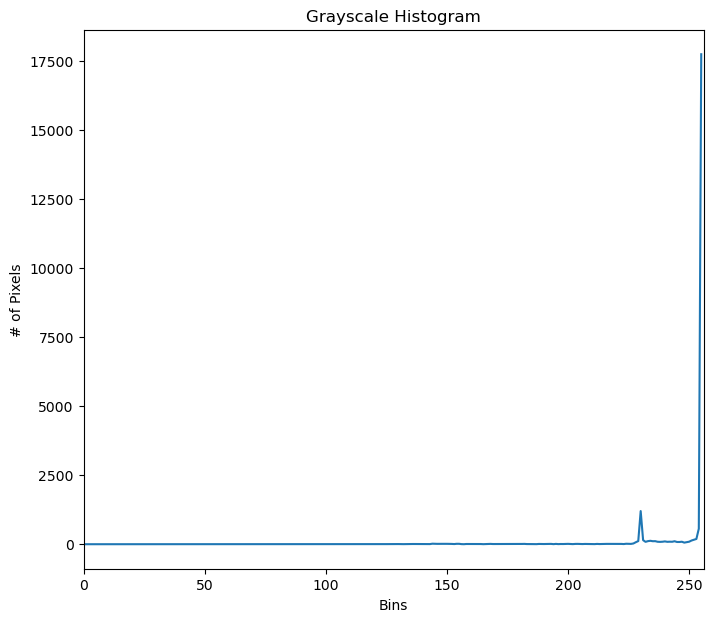

In [13]:
# With our image histogram computed we display the grayscale image on our screen and plot the unnormalized image histogram-
plt.figure(figsize = (8, 7))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [16]:
# normalize the raw frequency distribution/count histogram-
'''
Simply dividing the raw frequency counts for each bin of the histogram by the sum of the counts — leaves
us with the percentage of each bin rather than the raw count of each bin.
'''
hist /= hist.sum()

In [17]:
hist.shape

(256, 1)

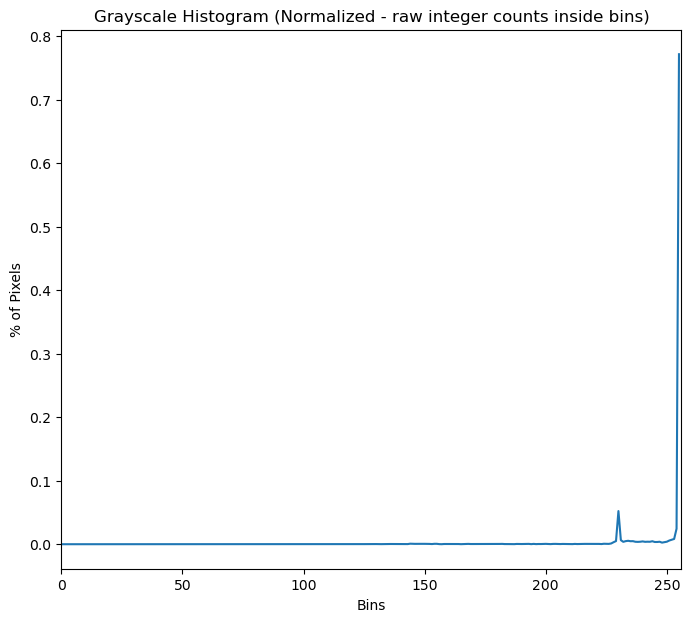

In [31]:
# plot the normalized histogram-
plt.figure(figsize = (8, 7))
plt.title("Grayscale Histogram (Normalized - raw integer counts inside bins)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

<Figure size 900x900 with 0 Axes>

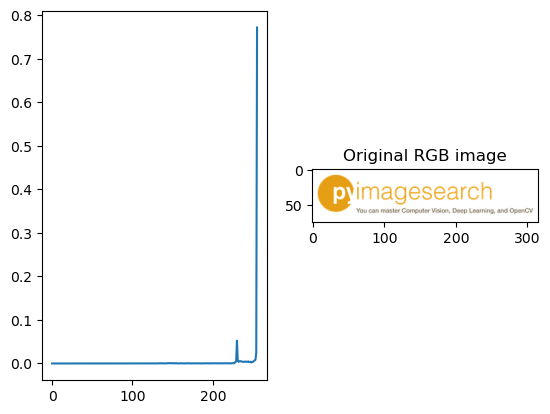

In [22]:
plt.figure(figsize = (9, 9))
f, axarr = plt.subplots(1, 2)
axarr[0].plot(hist)
plt.title("normalized gray-scale histogram")
axarr[1].imshow(img)
plt.title("Original RGB image")

# plt.suptitle("OpenCV2 calcHist example")
plt.show()

So, how do we interpret this histogram?

The bins (0-255) are plotted on the x-axis. And the y-axis counts the number of pixels in each bin. The majority of the pixels fall in the range of roughly 250 to 255. Looking at the left tail of the histogram, we can see that very few pixels fall in the range [0, 200] — this implies that there are very few _black_ pixels in the image.

An unnormalized histogram contains the raw integer counts inside the bins. If we instead want the percentage counts (such that when added all values sum to 1), we can use the normalized histogram. Notice how the shape of the distributions themselves are identical; however, the scale along the y-axis is different. For a normalized histogram, the bin counts are expressed as percentages rather than raw counts.

### Creating color histograms with OpenCV

In the previous section, we explored grayscale histograms. Now let’s move on to computing a histogram for each channel of the image.

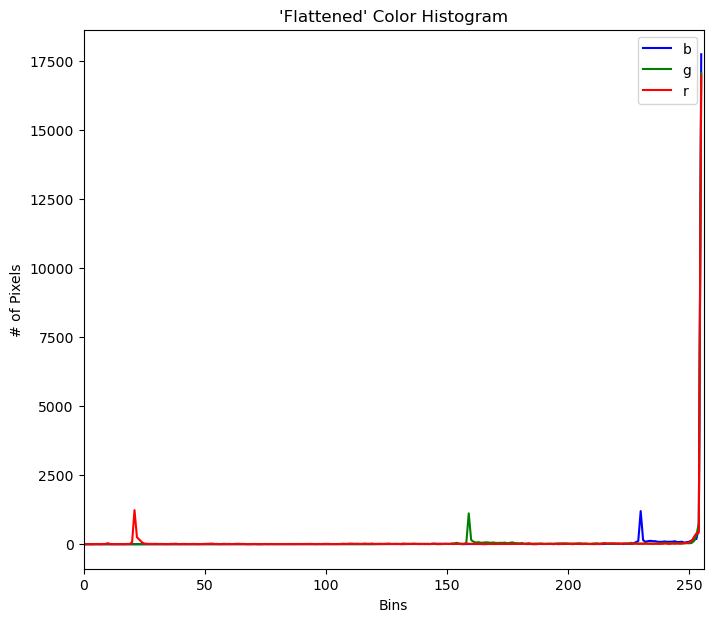

In [34]:
# Split the image into its respective channels, then initialize the tuple of channel names along with our figure for plotting-
# Plotting a histogram for each channel allows us to characterize the distribution of pixel intensities. 
chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure(figsize = (8, 7))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over each of the channels in the image-
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color, label = color)
    plt.xlim([0, 256])

plt.legend(loc = 'best')
plt.show()

In [42]:
for i in range(len(chans)):
    print(f"{i}th channel has shape: {chans[i].shape}")

0th channel has shape: (73, 315)
1th channel has shape: (73, 315)
2th channel has shape: (73, 315)


### Compute a 2D histogram

Up until this point, we have computed a histogram for only one channel at a time. Now we move on to __multi-dimensional histograms and take into consideration two channels at a time__.

The way I like to explain multi-dimensional histograms is to use the word AND. For example, we can ask a question such as:

- How many pixels have a Red value of 10 AND a Blue value of 30?
- How many pixels have a Green value of 200 AND a Red value of 130?

By using the conjunctive AND, we are able to construct multidimensional histograms.

Now, we are computing a 2D color histogram for each combination of RGB channels: Red and Green, Red and Blue, and Green and Blue. Now that we are working with multi-dimensional histograms, we need to keep in mind the number of bins we are using. In previous examples, I’ve used 256 bins for demonstration purposes. However, if we used 256 bins for each dimension in a 2D histogram, our resulting histogram would have 65,536 separate pixel counts (since 256×256 = 65,536). Not only is this wasteful of resources, it’s not practical. Most applications use somewhere between 8 and 64 bins when computing multi-dimensional histograms. _We now use 32 bins instead of 256 bins_.

The most important takeaway from this code can be seen by inspecting the first arguments to the ```cv2.calcHist``` function. Here we see that __we are passing in a list of two channels: the Green and Blue channels__. And that’s all there is to it.

So __how is a 2D histogram stored in OpenCV? It’s a 2D NumPy array. Since 32 bins are used for each channel, we now have a 32×32 histogram__. Our 2D histogram will have a dimensionality of 32×32 = 1024.

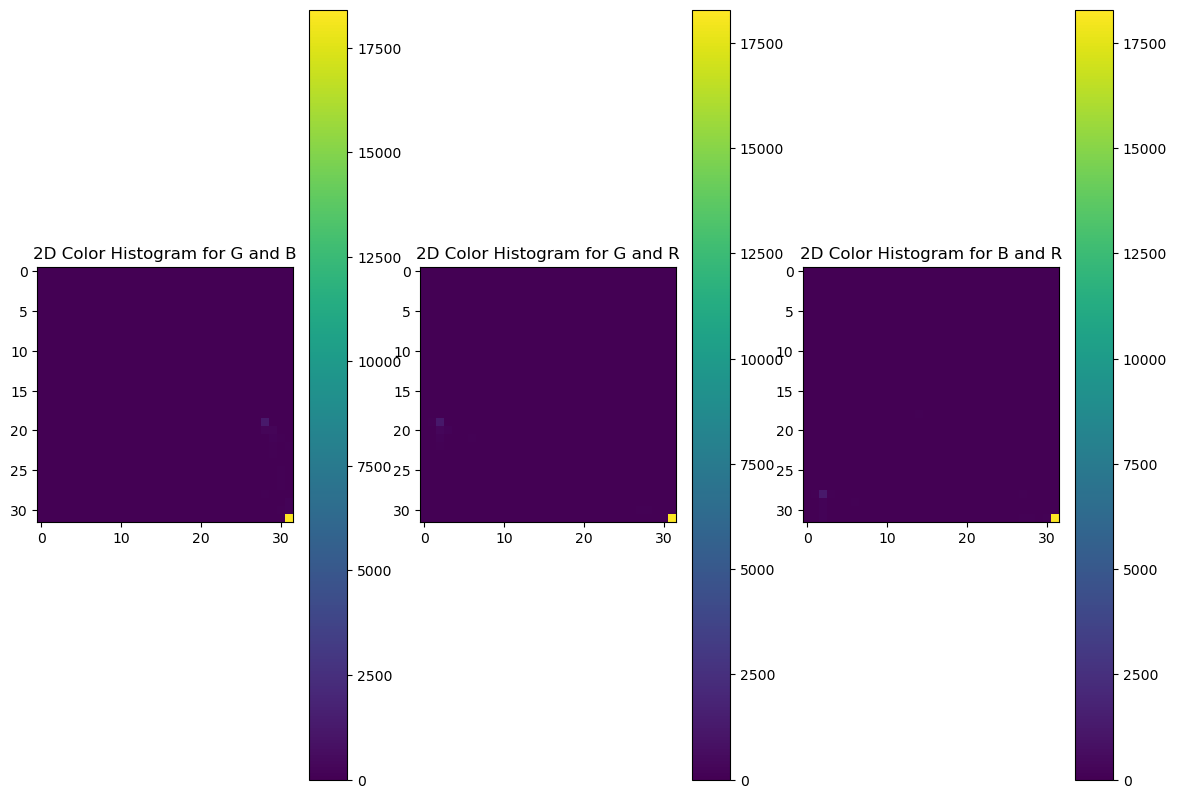

In [45]:
# Create a new figure and then plot a 2D color histogram for the green and blue channels
fig = plt.figure(figsize = (14, 10))

ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

plt.show()

In [36]:
# Let's examine the dimensionality of one of the 2D histograms-
print(f"2D histogram shape: {hist.shape}, with {hist.flatten().shape[0]} values")

2D histogram shape: (32, 32), with 1024 values


Using a 2D histogram takes into account two channels at a time. But what if we wanted to account for all three RGB channels? We’re now going to build a 3D histogram: